In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Segmentación de Imágenes Usando la Transformada Watershed

La *Transformada Watershed* es un algortimo que permite realizar segmentación de imágenes. Así como el algoritmo Canny que trabajamos la clase pasada, es un paso preliminar a la aplicación de la transformada de Hough para la parametrización de los segmentos identificados.  

En la sección 11.5 del libro Digital Image Processing using Matlab de Gonzalez, Woods y Eddings que les subí a Sicua+ (les subí la versión de una versión más actual que la que había subido el lunes) encuentran una descripción del método y cómo implementarlo en Matlab. El objetivo de este taller es familiarizarse con algunos de los algoritmos de procesamiento de imágenes que permiten segmentar y parametrizar características de imágenes con el fin de desarrollar un método de granulometría de metales.  

Con el fin de satisfacer los objetivos planteados se le pide:  

* Leer el archivo de granulometría que va a analizar.  
* Reproducir el resultado mostrado en la Figura 11.28 de la referencia utilizando la herramienta OpenCV. Para esto se recomienda inicialmente revisar y reproducir:  
    * https://stackoverflow.com/questions/11294859/how-to-define-the-markers-for-watershed-in-opencv  
    * https://docs.opencv.org/3.3.1/d3/db4/tutorial_py_watershed.html  
* Ajustar el procedimiento para que segmente eficientemente las imágenes de granulometría.  
* Aplicar la transformada de Hough para parametrizar los segmentos identificados. Para esto se recomienda probar con círculos o elípses para determinar cuál tiene un mejor rendimiento.  
* Extraer la distribución de diámetros de los granos identificados.  
* Generar un histograma de la distribución de tamaño de grano encontrado.  

In [11]:
im1 = pylab.imread("imagen1.tif")
#print imagen
pylab.imshow(im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)

import numpy as np
import cv2
from matplotlib import pyplot as plt
%pylab inline
import scipy
from scipy import misc
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


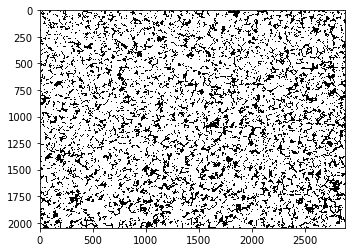

In [13]:
gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
pylab.imshow(thresh, cmap = cm.Greys_r)

misc.imsave('res.jpg', thresh)


In [18]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

pylab.imshow(sure_bg, cmap = cm.Greys_r)

error: C:\projects\opencv-python\opencv\modules\imgproc\src\distransform.cpp:737: error: (-201) Mask size should be 3 or 5 or 0 (precise) in function cv::distanceTransform
